In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

Running on <IBMBackend('ibmq_lima')>


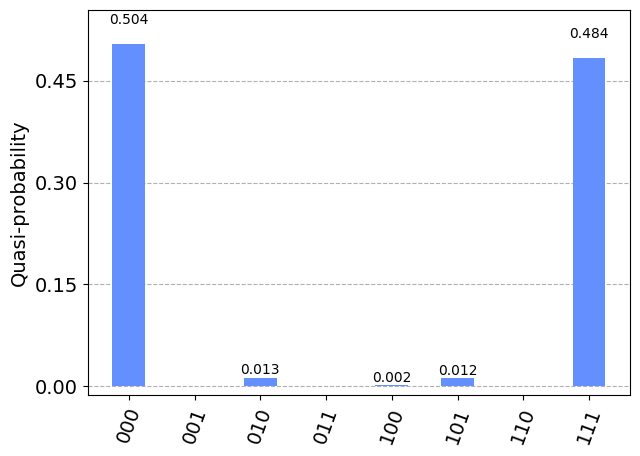

In [3]:
# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
# If you're running this locally, load your IBM Quantum API token using
# service = QiskitRuntimeService(channel="ibm_quantum", token="3729d8a6a46d5b4555b2979422ad68acfb8f9c3d10e5355a02165bb373ab6f69de88c9019d9b1778438bbb9502b3bc88ab54543e0758f4b3c39e0e2250f9fd70")
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(simulator=False, operational=True)
print(f'Running on {backend}')

# 3. Run your circuit on that device
with Session(backend=backend):
    sampler = Sampler()
    result = sampler.run(qc).result()

# 4. Plot the results
from qiskit.visualization import plot_histogram
distribution = result.quasi_dists[0].binary_probabilities()
plot_histogram(distribution)